# Machine Learning HW5 Simulation Part (Gaussian Mixture Models (GMM))
## Amirmahdi Ansaripour (810198358)

In this exercise, The Gaussian Mixture Models (GMM), which is a branch of a more general approach, Expectation Maximization (EM), is discussed. The algorithm is used for clustering and distribution estimation. Consider the observed dataset $D = \{\vec{x_1}, \vec{x_2}, \vec{x_3}, ... , \vec{x_n}\}$: 

$\theta^\ast = \underset{\theta}{\operatorname{argmax}} \space E_{Z|X, \theta} [\space 
\sum_{i = 1}^n log (P(x_i, z_i | \theta)) 
\space]$

Where

1. $Z = \{\vec{z_1}, \vec{z_2}, \vec{z_3}, ... , \vec{z_n}\} \space \&\& \space \vec{z_i} = \begin{cases} 
      1 & k == i \\
      0 & \text{o.w.} 
   \end{cases}$

2. $\sum_k \alpha_k = 1$

3. $P(x_i | \theta) = \sum_{k = 1}^K \alpha_k N(x_i | \mu_k , \sum_k) \space\space\space\space ( K \space \text{is number of classes} )$

4. $P(x_i, z_i | \theta) = \Pi_{k = 1}^{K} (\alpha_k N(x_i | \mu_k , \sum_k))^{z_{ik}} $

5. $\theta = (\alpha_1 , \alpha_2 , \alpha_3 , ... , \alpha_K , \mu_1 , \mu_2 , \mu_3 , ... , \mu_K , \sum_1 , \sum_2 , \sum_3 , ... , \sum_K)$

The parameter $Z$ determines the cluster to which each sample belongs, so it is also useful for clustering. Since we do not have the exact value of $Z$, we try to maximize the expectation of observed variables with respect to $Z|X, \theta$. Parameter $\alpha_i $ determines the proportion that the $i$ th Gaussian distribution (with $\mu_i$ as mean and $\sum_i$ as covariance matrix) has.

If we assume that $P(Z| X , \theta)$ has a Gaussian distribution, the method is called Gaussian Mixture Models, or GMM.   


Also pay attention that because of the $\sum_k \alpha_k = 1$ condition, the Lagrangian function should be employed.

In [81]:
from PIL import Image
import glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import pandas as pds
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [82]:
def load_images(add, classs):
    Images = []
    values = []
    labels = []
    for filename in glob.glob(add):
        if filename[20] == classs:
            image = Image.open(filename)
            Images.append(image)
            values.append(np.asarray(image))
            labels.append(filename[20])
    return Images, values, labels

In [83]:
def extract_features(im):
    rb_values = []
    for i in range(len(im)): 
        red = 0
        blue = 0
        ## values[i]
        length = im[i].shape[0]
        width = im[i].shape[1]
        for j in range(len(im[i])):
            ## values[i][j]
            for k in range(len(im[i][j])):
                red += im[i][j][k][0]
                blue += im[i][j][k][2]
                ## values[i][j][k]
        rb_values.append([red/(length*width), blue/(length*width)])
    return rb_values

In [84]:
def fit_GMM(features, number_of_componentes):
    model = GaussianMixture(n_components = number_of_componentes,
                           covariance_type = 'full',
                           init_params = 'kmeans',
                           max_iter = 500,
                           )
    return model

In [85]:
def get_groups(labels, features):
    red_samples = []
    blue_samples = []
    for i in range(len(labels)):
        if labels[i] == 0:
            red_samples.append(features[i])
        elif labels[i] == 1:
            blue_samples.append(features[i])
    return red_samples, blue_samples

In [86]:
def print_parameters_of_GMM(model_brief):
    list_of_means = []
    list_of_covs = []
    means = model_brief.means_
    covariances = model_brief.covariances_
    for i in range(len(means)):
        mean_i = model_brief.means_[i]
        cov_i = model_brief.covariances_[i]
        list_of_means.append([mean_i[0], mean_i[1]])
        list_of_covs.append(cov_i)
        print('Mean of', i + 1, 'th component: \t\t' , mean_i)
        print('Covariance matrix of', i + 1, 'th component: \t', cov_i[0],'\n\t\t\t\t\t', cov_i[1])
        print('\n%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\n')
    return list_of_means

In [87]:
def plot_contour(model, features):
    lower_bound = min(min(features[:,0]), min(features[:,1])) - 5
    upper_bound = max(max(features[:,0]), max(features[:,1])) + 5
    scale = np.linspace(lower_bound, upper_bound,100)
    x, y = np.meshgrid(scale, scale)
    plane = np.array([x.ravel(), y.ravel()]).T
    contour = -model.score_samples(plane)
    contour = contour.reshape(x.shape)
    plt.contour(x, y, contour)

In [88]:
def plot_groups(points, colour, means, tit):
    plt.scatter(points[:,0], points[:,1] ,color = colour)
    for i in range(len(means)):
        plt.scatter(means[i][0], means[i][1], c = 'magenta', s = 100)
    plt.xlabel('Red value')
    plt.ylabel('Blue value')
    plt.title('Clustering of pictures for class ' + tit)

## Density estimation for class Chelsea

The dataset which is going to be clustered consists of images of Chelsea and Manchester United teams, and the features based on which the observed variables are made are Red and Blue values of each pixcel.

In the following part, images are loaded at the first step. Then, features are extracted and a GMM model is fitted on them. The GMM contains two Gaussian components which estimate where the density of samples is higher. 

Each component has a mean and covariance matrix which are mentioned.

In [89]:
images, values, labels = load_images('./Q6_Dataset/Images/*.*', 'c')
rb_values = extract_features(values)
rb_values = np.array(rb_values)

In [90]:
gmm = fit_GMM(rb_values, 2)
model_brief = gmm.fit(rb_values)
model_pred = gmm.predict(rb_values)

In [91]:
list_of_means = print_parameters_of_GMM(model_brief)

Mean of 1 th component: 		 [111.25844706 138.50170178]
Covariance matrix of 1 th component: 	 [886.24511601 598.59601037] 
					 [598.59601037 564.06184031]

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Mean of 2 th component: 		 [75.18879295 78.82802975]
Covariance matrix of 2 th component: 	 [429.31778971 283.28915621] 
					 [283.28915621 439.25586779]

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



The gaussian components are shown with their means whose colors are pink. Pay attention that the means are located in the most dense parts of the space, and other less dense areas are covered in farther layers.

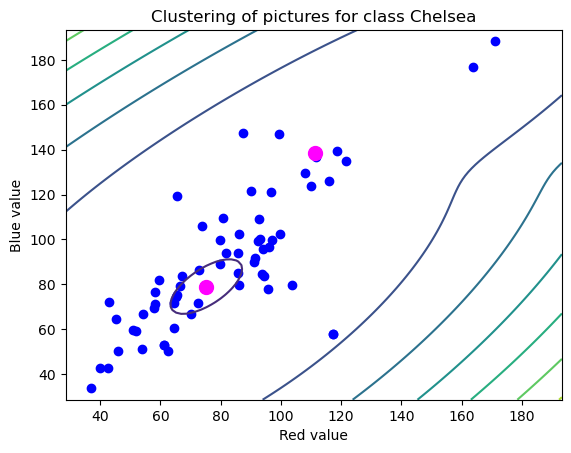

In [92]:
plot_groups(rb_values, 'blue', list_of_means, 'Chelsea')
plot_contour(gmm, rb_values)
plt.show()

## Density estimation for class Manchester United

The same procedure explained earlier is applied to estimate the density of Man United images. The contours of Gaussian components are shown in the final plot. Notice that the pink points are Gaussian means.

In [93]:
images, values, labels = load_images('./Q6_Dataset/Images/*.*', 'm')
rb_values = extract_features(values)
rb_values = np.array(rb_values)

In [94]:
gmm = fit_GMM(rb_values, 2)
model_brief = gmm.fit(rb_values)
model_pred = gmm.predict(rb_values)

In [95]:
list_of_means = print_parameters_of_GMM(model_brief)

Mean of 1 th component: 		 [117.05639054  75.19054367]
Covariance matrix of 1 th component: 	 [681.86708078 377.87565439] 
					 [377.87565439 550.16758314]

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Mean of 2 th component: 		 [83.80336303 54.15539438]
Covariance matrix of 2 th component: 	 [360.9202246  223.63866721] 
					 [223.63866721 173.7818495 ]

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



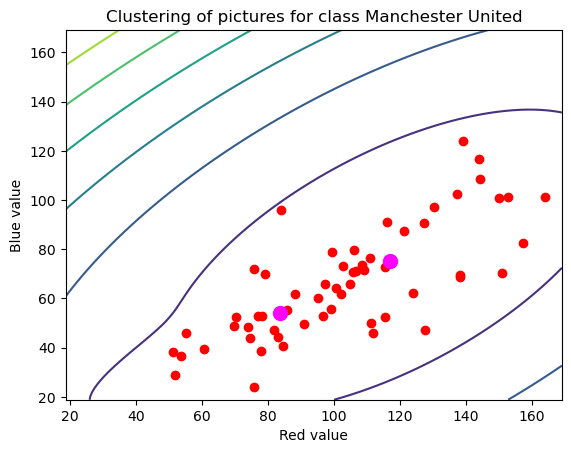

In [96]:
plot_groups(rb_values, 'red', list_of_means, 'Manchester United')
plot_contour(gmm, rb_values)
plt.show()